In [1]:
import sklearn.datasets
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### loading handwritten ones and zeros from the built-in datasets

In [2]:
#images = sklearn.datasets.load_digits(2).images
data = sklearn.datasets.load_breast_cancer().data
targets = sklearn.datasets.load_breast_cancer()['target']
data.shape

(569, 30)

### show some of the images

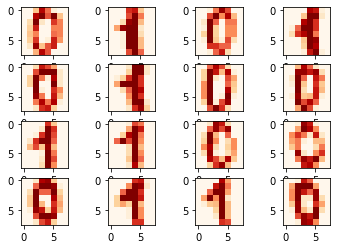

In [11]:
images.shape
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(images[i], cmap="OrRd")


In [99]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, roc_curve

create training and test sets:

In [90]:
X_train, X_test, y_train, y_test = train_test_split(data, targets,train_size = 0.8  )

In [91]:
 pipe = Pipeline([('scaler', StandardScaler()), ('logreg', LogisticRegression())])
 pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('logreg',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [92]:
y_pred = pipe.predict(X_test)

In [93]:
pipe.score(X_test, y_test)

0.956140350877193

In [87]:
pred_proba = pipe.predict_proba(X_test)
pred_y = pipe.predict(X_test).reshape(-1,1)

In [88]:
y_test.shape

(114,)

In [55]:
np.hstack((pred_proba, pred_y, y_test.reshape(-1,1)))

array([[9.98856830e-01, 1.14317010e-03, 0.00000000e+00, 0.00000000e+00],
       [1.02410041e-03, 9.98975900e-01, 1.00000000e+00, 1.00000000e+00],
       [9.71342259e-04, 9.99028658e-01, 1.00000000e+00, 1.00000000e+00],
       [7.86723588e-03, 9.92132764e-01, 1.00000000e+00, 1.00000000e+00],
       [1.28255667e-04, 9.99871744e-01, 1.00000000e+00, 1.00000000e+00],
       [7.24076479e-01, 2.75923521e-01, 0.00000000e+00, 0.00000000e+00],
       [2.97897536e-04, 9.99702102e-01, 1.00000000e+00, 1.00000000e+00],
       [9.97157844e-01, 2.84215620e-03, 0.00000000e+00, 0.00000000e+00],
       [8.77767318e-04, 9.99122233e-01, 1.00000000e+00, 1.00000000e+00],
       [7.07872359e-04, 9.99292128e-01, 1.00000000e+00, 1.00000000e+00],
       [1.53689467e-03, 9.98463105e-01, 1.00000000e+00, 1.00000000e+00],
       [9.99760701e-01, 2.39299330e-04, 0.00000000e+00, 0.00000000e+00],
       [9.99848023e-01, 1.51977373e-04, 0.00000000e+00, 0.00000000e+00],
       [9.96795549e-01, 3.20445111e-03, 0.00000000e

In [64]:
np.cov(X_train.T)

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  3.10564266e-02,  4.41831204e-02, ...,
         2.68704026e-02,  2.64953542e-02, -1.06465350e-02],
       [ 0.00000000e+00,  4.41831204e-02,  1.11844754e+01, ...,
        -1.63129113e+00,  3.30516841e+00,  2.86953155e+00],
       ...,
       [ 0.00000000e+00,  2.68704026e-02, -1.63129113e+00, ...,
         2.79970843e+01,  1.26154907e+01,  5.44967093e+00],
       [ 0.00000000e+00,  2.64953542e-02,  3.30516841e+00, ...,
         1.26154907e+01,  1.50169861e+01,  8.69918699e+00],
       [ 0.00000000e+00, -1.06465350e-02,  2.86953155e+00, ...,
         5.44967093e+00,  8.69918699e+00,  6.90050329e+00]])

In [66]:
(X_train.T @ X_train) / X_train.shape[0]

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 3.12500000e-02, 1.00694444e-01, ...,
        1.45833333e-01, 5.20833333e-02, 0.00000000e+00],
       [0.00000000e+00, 1.00694444e-01, 2.17986111e+01, ...,
        2.07569444e+01, 8.12152778e+00, 4.85416667e+00],
       ...,
       [0.00000000e+00, 1.45833333e-01, 2.07569444e+01, ...,
        7.49270833e+01, 2.27152778e+01, 9.62152778e+00],
       [0.00000000e+00, 5.20833333e-02, 8.12152778e+00, ...,
        2.27152778e+01, 1.71527778e+01, 9.57291667e+00],
       [0.00000000e+00, 0.00000000e+00, 4.85416667e+00, ...,
        9.62152778e+00, 9.57291667e+00, 7.25000000e+00]])

In [76]:
X_tmp = (X_train - np.mean(X_train, axis=1).reshape(-1,1))
(X_tmp.T @ X_tmp)/ X_train.shape[0]

array([[24.74455516, 24.65579647,  8.23175134, ..., -9.55535804,
        17.48853302, 21.84996965],
       [24.65579647, 24.59828779,  8.2436871 , ..., -9.49828339,
        17.45185767, 21.76121097],
       [ 8.23175134,  8.2436871 , 13.51755863, ..., -5.31121741,
         9.09725698, 10.1913325 ],
       ...,
       [-9.55535804, -9.49828339, -5.31121741, ..., 31.0718121 ,
         5.9038976 , -2.82841576],
       [17.48853302, 17.45185767,  9.09725698, ...,  5.9038976 ,
        27.38528866, 24.16686418],
       [21.84996965, 21.76121097, 10.1913325 , ..., -2.82841576,
        24.16686418, 26.20538415]])

In [79]:
dataset = sklearn.datasets.load_breast_cancer()

In [80]:
dataset

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

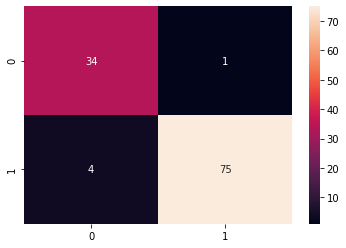

In [98]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True )

In [113]:
tpr, fpr, thresholds = roc_curve(pred_y.reshape(-1, 1), pred_proba[:, 0].reshape(-1,1))

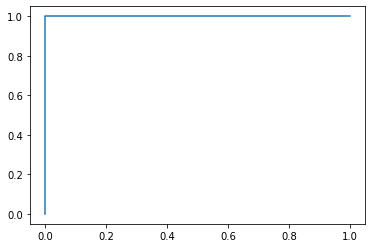

In [115]:
plt.plot(fpr, tpr)